In [1]:
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [3]:
#1 데이터셋 생성
(xTrain, yTrain), (xTest, yTest)=mnist.load_data()

In [4]:
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [5]:
yTrain
yTrain=np_utils.to_categorical(yTrain) # ohe 
yTest=np_utils.to_categorical(yTest)

In [6]:
#2 모델구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
#3 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
#4 모델 학습
hist=model.fit(xTrain, yTrain, epochs=5, batch_size=32)
# batch_size : 몇개의 샘플로가중치를 갱신할 것인지?


Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.6849 - accuracy: 0.8271
Epoch 2/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.3455 - accuracy: 0.9027
Epoch 3/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2977 - accuracy: 0.9160
Epoch 4/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2685 - accuracy: 0.9244
Epoch 5/5
60000/60000 [==============================] - 2s 28us/step - loss: 0.2462 - accuracy: 0.9312


In [9]:
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.684912236237526, 0.3454905819296837, 0.2976654389222463, 0.2685125205616156, 0.2462498630642891]
[0.82715, 0.9026667, 0.9159667, 0.92445, 0.93118334]


In [10]:
#6 모델 평가
res=model.evaluate(xTest, yTest, batch_size=32)
print(res)

10000/10000 [==============================] - 0s 20us/step
[0.2319662105113268, 0.9350000023841858]


In [11]:
# 모델 예측
xhat=xTest[0:1]
yhat=model.predict(xhat)
print(yhat)

[[1.0997115e-04 2.8435650e-07 3.1823575e-04 4.7438857e-03 1.7661562e-06
  8.5866930e-05 3.6551587e-08 9.9332857e-01 7.9864156e-05 1.3315423e-03]]


In [12]:
import numpy as np
np.random.seed(3)

In [13]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [14]:
xVal=xTrain[50000:]
yVal=yTrain[50000:]
xTrain=xTrain[:50000]
yTrain=yTrain[:50000]

In [15]:
xTrain=xTrain.reshape(50000,784).astype('float32')/255.0
xVal=xVal.reshape(10000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [16]:
# 훈련, 검증 데이터 선택
tri=np.random.choice(50000,700)
vri=np.random.choice(10000,300)

In [17]:
xTrain=xTrain[tri] #700건
yTrain=yTrain[tri]
xVal=xVal[vri]  #300건
yVal=yVal[vri]

In [18]:
yTrain=np_utils.to_categorical(yTrain)
yVal=np_utils.to_categorical(yVal)
yTest=np_utils.to_categorical(yTest)

In [19]:
model=Sequential()
model.add(Dense(input_dim=28*28,units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [20]:
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [ ]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal))

In [ ]:
import matplotlib.pyplot as plt

figs, loss_ax=plt.subplots(figsize=(5,5))
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [ ]:
res=model.evaluate(xTest, yTest, batch_size=32)
print("cost : "+str(res[0]))
print("accuracy : "+str(res[1]))

In [ ]:
# 조기 종료
# callback 함수 : 어떤 상황이 되었을때 (val loss가 떨어지다가 올라가기 시작하는 시점)
# 함수 내에서 또다른 어떤 함수를 호출하는 것

In [25]:
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [22]:
es=EarlyStopping()

In [23]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 192us/step - loss: 2.2576 - accuracy: 0.1643 - val_loss: 2.2272 - val_accuracy: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 110us/step - loss: 2.2072 - accuracy: 0.1657 - val_loss: 2.1908 - val_accuracy: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 114us/step - loss: 2.1730 - accuracy: 0.1729 - val_loss: 2.1631 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 121us/step - loss: 2.1441 - accuracy: 0.1786 - val_loss: 2.1372 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 93us/step - loss: 2.1177 - accuracy: 0.1900 - val_loss: 2.1141 - val_accuracy: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 91us/step - loss: 2.0940 - accuracy: 0.2029 - val_loss: 2.0931 - val_accuracy: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 91us/step - loss: 2.0

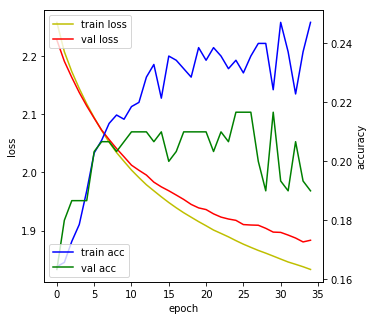

In [26]:
figs, loss_ax=plt.subplots(figsize=(5,5))
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [27]:
es=EarlyStopping(patience=30)

In [28]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 120us/step - loss: 1.8294 - accuracy: 0.2286 - val_loss: 1.8820 - val_accuracy: 0.2033
Epoch 2/3000
700/700 [==============================] - 0s 115us/step - loss: 1.8256 - accuracy: 0.2457 - val_loss: 1.8786 - val_accuracy: 0.2033
Epoch 3/3000
700/700 [==============================] - 0s 109us/step - loss: 1.8216 - accuracy: 0.2400 - val_loss: 1.8710 - val_accuracy: 0.1733
Epoch 4/3000
700/700 [==============================] - 0s 111us/step - loss: 1.8178 - accuracy: 0.2314 - val_loss: 1.8671 - val_accuracy: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 110us/step - loss: 1.8147 - accuracy: 0.2400 - val_loss: 1.8660 - val_accuracy: 0.1800
Epoch 6/3000
700/700 [==============================] - 0s 109us/step - loss: 1.8107 - accuracy: 0.2443 - val_loss: 1.8652 - val_accuracy: 0.1933
Epoch 7/3000
700/700 [==============================] - 0s 111us/step - loss: 

Epoch 57/3000
700/700 [==============================] - 0s 92us/step - loss: 1.6985 - accuracy: 0.3043 - val_loss: 1.8255 - val_accuracy: 0.2500
Epoch 58/3000
700/700 [==============================] - 0s 104us/step - loss: 1.6985 - accuracy: 0.3100 - val_loss: 1.8172 - val_accuracy: 0.2200
Epoch 59/3000
700/700 [==============================] - 0s 92us/step - loss: 1.6968 - accuracy: 0.3000 - val_loss: 1.8178 - val_accuracy: 0.2167
Epoch 60/3000
700/700 [==============================] - 0s 101us/step - loss: 1.6954 - accuracy: 0.2986 - val_loss: 1.8155 - val_accuracy: 0.2200
Epoch 61/3000
700/700 [==============================] - 0s 107us/step - loss: 1.6942 - accuracy: 0.3086 - val_loss: 1.8181 - val_accuracy: 0.2500
Epoch 62/3000
700/700 [==============================] - 0s 106us/step - loss: 1.6927 - accuracy: 0.3057 - val_loss: 1.8134 - val_accuracy: 0.2167
Epoch 63/3000
700/700 [==============================] - 0s 106us/step - loss: 1.6918 - accuracy: 0.3014 - val_loss: 1.8

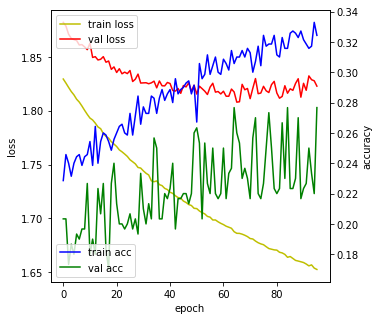

In [29]:
figs, loss_ax=plt.subplots(figsize=(5,5))
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [30]:
import tensorflow as tf

In [31]:
path="C:\/users/student/Downloads/데이터들/"

In [32]:
seed=123
np.random.seed(seed)
tf.set_random_seed(seed)

In [33]:
dataset=np.loadtxt(path+"/dataset/ThoraricSurgery.csv", delimiter=",")
np.shape(dataset)

(470, 18)

In [34]:
x=dataset[:,0:17]
y=dataset[:,17] # 1 : 수술 후 생존, 0 : 사망

In [35]:
model=Sequential()
model.add(Dense(30, input_dim=17, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # 0 or 1로 출력시 Dense에서 1 + 여기서 input_dim은 알아서 계산함 생략 가능

In [36]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [37]:
model.fit(x,y,epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 421us/step - loss: 0.6485 - accuracy: 0.3234
Epoch 2/30
470/470 [==============================] - 0s 89us/step - loss: 0.1497 - accuracy: 0.8489
Epoch 3/30
470/470 [==============================] - 0s 91us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 69us/step - loss: 0.1481 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 109us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 87us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 85us/step - loss: 0.1488 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 74us/step - loss: 0.1486 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 79us/step - loss: 0.1478 - accuracy: 0.8532
Epoch 10/30
470/470 [==============================] - 0s 85us/step - loss: 0.1474 - accu

In [38]:
print(model.evaluate(x,y)[1])

470/470 [==============================] - 0s 66us/step
0.8510638475418091


In [39]:
xy=np.loadtxt(path+'/실습데이터/data-03-diabetes.csv',delimiter=",")
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [40]:
xdata=xy[:,0:-1]
ydata=xy[:,[-1]]

In [41]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


In [42]:
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])

In [43]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+(1-y)*tf.log(1-hf))

In [44]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [45]:
predicted=tf.cast(hf>0.5, dtype=tf.float32)

In [46]:
accuracy=tf.reduce_mean(tf.cast(tf.equal(predicted,y), dtype=tf.float32))

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv, _=sess.run([cost, train], feed_dict={x:xdata, y:ydata})
        
        if step%200==0:
            print(step, cv)
        
    sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    

0 0.6649495
200 0.6359846
400 0.6176201
600 0.60283315
800 0.58997375
1000 0.57858455
1200 0.56845814
1400 0.55944633
1600 0.5514226
1800 0.5442741
2000 0.53789985
2200 0.53221005
2400 0.5271244
2600 0.52257234
2800 0.5184914
3000 0.51482666
3200 0.51152986
3400 0.50855845
3600 0.50587535
3800 0.503448
4000 0.5012477
4200 0.49924925
4400 0.49743074
4600 0.49577278
4800 0.49425828
5000 0.4928722
5200 0.49160126
5400 0.4904338
5600 0.4893595
5800 0.48836914
6000 0.48745462
6200 0.48660865
6400 0.48582488
6600 0.48509762
6800 0.48442155
7000 0.48379236
7200 0.48320577
7400 0.4826582
7600 0.48214638
7800 0.48166713
8000 0.4812182
8200 0.48079672
8400 0.48040077
8600 0.48002836
8800 0.4796775
9000 0.47934684
9200 0.47903478
9400 0.47873995
9600 0.47846115
9800 0.47819722
10000 0.4779472
[[0.40630245]
 [0.92906225]
 [0.26621935]
 [0.95562094]
 [0.14096898]
 [0.7826688 ]
 [0.9481636 ]
 [0.5874878 ]
 [0.26602998]
 [0.52751064]
 [0.6553572 ]
 [0.15498346]
 [0.2787206 ]
 [0.26970166]
 [0.7493561

### 1. 주식데이터


In [370]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [371]:
data=pd.read_csv(path+'/AMD.csv')
data.shape # 756,7
data[734:] # 최근 한달 자료

In [372]:
test=data[['Open','High','Low','Volume','Close']]
scaler.fit(test)
X_scaled = scaler.transform(test)
len(X_scaled)
xdata=X_scaled[:,:4]
ydata=X_scaled[:,[-1]]

In [373]:
x_train_data=xdata[:514]
y_train_data=ydata[:514]

x_val_data=xdata[514:734]
y_val_data=ydata[514:734]

x_test_data=xdata[734:]
y_test_data=ydata[734:]

In [438]:
x=tf.placeholder(tf.float32,shape=[None,4])
y=tf.placeholder(tf.float32,shape=[None,1])
w=tf.Variable(tf.random_normal([4,1]))*3e-2
b=tf.Variable(tf.random_normal([1]))*3e-2

In [439]:
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(hf-y)
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [440]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(20001):
        cv, hvv,_=sess.run([cost, hf, train], feed_dict={x:x_train_data,y:y_train_data})
        if step%200==0:
            print(step, cv)
    hv=sess.run([hf], feed_dict={x:x_val_data, y:y_val_data})
    h_amd=sess.run([hf], feed_dict={x:x_test_data, y:y_test_data})

0 0.55636585
200 0.5528577
400 0.5493496
600 0.5458415
800 0.5423333
1000 0.5388251
1200 0.53531677
1400 0.5318087
1600 0.5283004
1800 0.52479213
2000 0.52128386
2200 0.5177755
2400 0.5142673
2600 0.5107591
2800 0.5072509
3000 0.50374275
3200 0.5002345
3400 0.4967263
3600 0.49321812
3800 0.48970985
4000 0.48620155
4200 0.48269323
4400 0.479185
4600 0.4756767
4800 0.4721683
5000 0.46865964
5200 0.46515098
5400 0.46164235
5600 0.4581337
5800 0.45462495
6000 0.45111626
6200 0.44760764
6400 0.44409898
6600 0.44059026
6800 0.43708166
7000 0.43357325
7200 0.43006474
7400 0.4265563
7600 0.42304793
7800 0.41953954
8000 0.4160312
8200 0.41252324
8400 0.40901563
8600 0.40550795
8800 0.40200025
9000 0.39849266
9200 0.39498496
9400 0.39147732
9600 0.38796964
9800 0.38446203
10000 0.38095436
10200 0.37744668
10400 0.37393904
10600 0.3704314
10800 0.36692372
11000 0.36341605
11200 0.35990843
11400 0.3564007
11600 0.35289308
11800 0.34938547
12000 0.3458773
12200 0.34236878
12400 0.33886036
12600 0.3

Text(0, 0.5, 'Test')

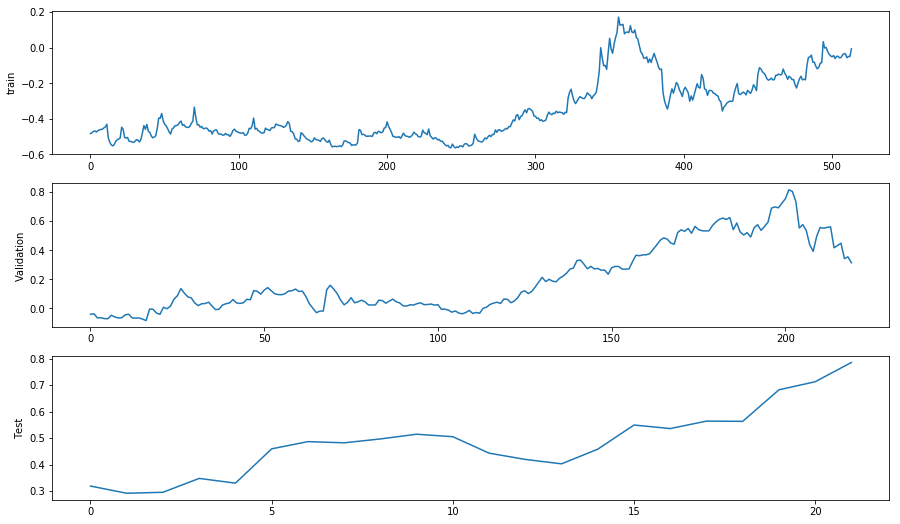

In [441]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,9))

ax1.plot(hvv)
ax2.plot(hv[0])
ax3.plot(h_amd[0])

ax1.set_ylabel("train")
ax2.set_ylabel('Validation')
ax3.set_ylabel('Test')

'C:\\/users/student/Downloads/데이터들/실습데이터'

In [509]:
tree=pd.read_csv(path+"실습데이터/trees.csv")

x=tree[['Girth','Height']]
y=tree['Volume']

In [520]:
x_data=x.as_matrix()

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [521]:
y_data=np.array(y).reshape(31,1)

In [522]:
x_train=x_data[:22]
y_train=y_data[:22]
x_test=x_data[22:]
y_test=y_data[22:]

In [546]:
x=tf.placeholder(tf.float32, shape=[None,2])
w=tf.Variable(tf.random_normal([2,1]))*2e-3
b=tf.Variable(tf.random_normal([1]))*2e-3
y=tf.placeholder(tf.float32, shape=[None,1])

In [547]:
hf=tf.matmul(x,w)+b
cost=tf.reduce_mean(hf-y)
train=tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [549]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(5001):
        cv, hv, _=sess.run([cost, hf, train], feed_dict={x:x_train, y:y_train})
#         if step%500==0:
#             print(step, cv)
    yv=sess.run([y], feed_dict={x:x_test, y:y_test})
    print(yv)

[array([[36.3],
       [38.3],
       [42.6],
       [55.4],
       [55.7],
       [58.3],
       [51.5],
       [51. ],
       [77. ]], dtype=float32)]
